In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Data cleaning

In [7]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Some ratings are more than 5 (Needs to be handled)

In [10]:
ratings_outliers=df[df['Rating']>5]
ratings_outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df[df['Rating']>5]=df.Rating.median()

In [13]:
df.describe()

,Rating
count,9367.000000
mean,4.191769
std,0.515193
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [23]:
df.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

There are some non float values in size

In [24]:


def size_to_mb(size):
    try:
        size = str(size)
        if size.endswith('M'):
            return float(size[:-1])
        elif size.endswith('K'):
            return float(size[:-1]) / 1024
        elif size.endswith('G'):
            return float(size[:-1]) * 1024
        else:
            # Non-numeric or unknown sizes
            return np.nan
    except:
        return np.nan

df['Size_MB'] = df['Size'].apply(size_to_mb)


In [27]:
df.Size_MB.describe()

count    8829.000000
mean       22.270540
std        22.628691
min         1.000000
25%         5.400000
50%        14.000000
75%        31.000000
max       100.000000
Name: Size_MB, dtype: float64

<Axes: ylabel='Size_MB'>

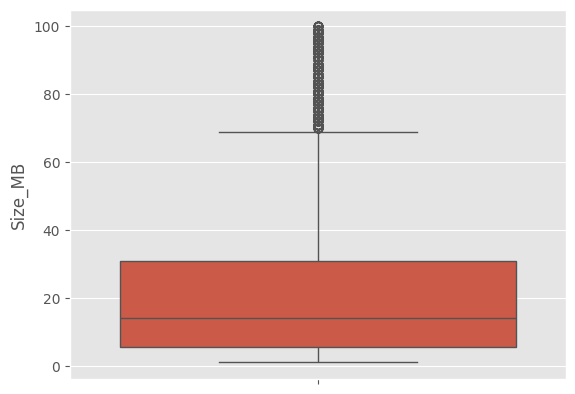

In [29]:
sns.boxplot(df.Size_MB)

In [31]:
df[df.Size_MB > 50]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
50,Real Tractor Farming,AUTO_AND_VEHICLES,4.0,1598,56M,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 26, 2018",11.0,4.1 and up,56.0
51,Ultimate F1 Racing Championship,AUTO_AND_VEHICLES,3.8,284,57M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 26, 2018",3.0,4.1 and up,57.0
57,Extreme Rally Championship,AUTO_AND_VEHICLES,4.2,129,54M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 26, 2018",3.0,4.1 and up,54.0
103,Beauty Selfie Camera,BEAUTY,4.2,2225,52M,"500,000+",Free,0,Everyone,Beauty,"February 28, 2018",1.6,4.1 and up,52.0
122,"Sephora: Skin Care, Beauty Makeup & Fragrance ...",BEAUTY,4.5,26834,57M,"1,000,000+",Free,0,Everyone,Beauty,"July 24, 2018",18.5,5.0 and up,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10784,Big Hunter,GAME,4.3,245455,84M,"10,000,000+",Free,0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up,84.0
10793,Sid Story,GAME,4.4,28510,78M,"500,000+",Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up,78.0
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,"1,000,000+",Free,0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up,81.0
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up,82.0


### Looks Normal

In [37]:
def prices_to_float(price_str):
    try:
        price = str(price_str).replace('$', '').replace(',', '')
        return float(price)
    except:
        return np.nan

df['Price'] = df['Price'].apply(prices_to_float)


In [38]:
df.Price.describe()

count    10841.000000
mean         1.027670
std         15.948999
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

### Some prices are high

<Axes: ylabel='Price'>

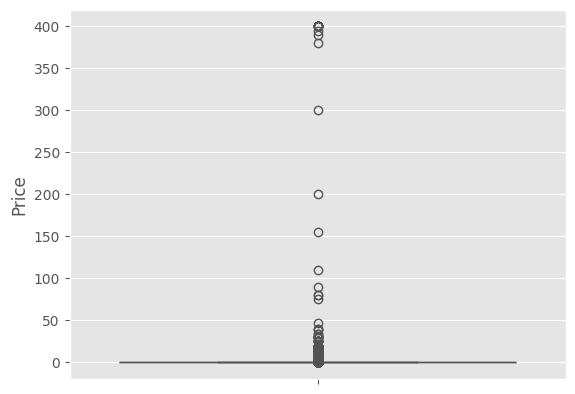

In [43]:
sns.boxplot(df.Price)

In [47]:
df.sort_values('Price', ascending=False).groupby('Category').head(1).sort_values('Price', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,7.3
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,8.7
5369,I am Rich,FINANCE,4.3,180,3.8M,"5,000+",Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up,3.8
9719,EP Cook Book,MEDICAL,NaN,0,3.2M,0+,Paid,200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up,3.2
6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4M,0+,Paid,154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up,5.4
6624,BP Fitness Lead Scanner,EVENTS,NaN,0,6.7M,1+,Paid,109.99,Everyone,Events,"August 23, 2017",0.0.1,4.1 and up,6.7
9730,Lean EQ,BUSINESS,NaN,6,10M,10+,Paid,89.99,Everyone,Business,"February 14, 2017",1.0,4.1 and up,10.0
3039,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25M,"50,000+",Paid,29.99,Everyone,Sports,"July 11, 2018",4.18.0,4.1 and up,25.0
8328,Guide to Nikon Df,PHOTOGRAPHY,NaN,1,663k,10+,Paid,29.99,Everyone,Photography,"February 18, 2014",2.0.0,4.0.3 and up,NaN
4177,G-NetReport Pro,TOOLS,NaN,0,1.6M,10+,Paid,25.99,Everyone,Tools,"June 14, 2018",5.0,4.0 and up,1.6


### Its normal they are expensive apps not errors

<Axes: xlabel='Price_Log', ylabel='Count'>

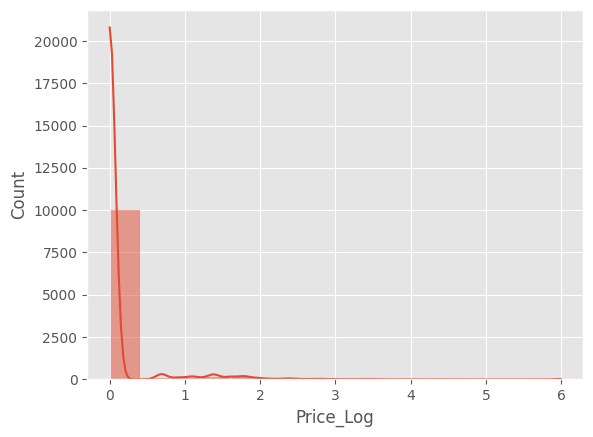

In [50]:
#We can use log transform for visualization
df['Price_Log'] = np.log1p(df['Price'])
sns.histplot(df.Price_Log, kde=True)

In [51]:
df.Category.value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
4.3                       1
Name: count, dtype: int64

### Strange category with name 4.3

In [ ]:
df[df['Category'] == 4.3]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Price_Log
10472,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,NaN,1.667707


In [ ]:
# Whole row is dropped
df.drop(index=df[df['Category'] == 4.3].index, inplace=True)
df[df['Category'] == 4.3]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Price_Log


In [59]:
df['Android Ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 10840, dtype: object

### Want to fix it

In [ ]:

def android_ver_to_float(ver):
    try:
        ver = str(ver)
        if ver.lower() == "varies with device":
            return np.nan  
        return float(ver.split()[0])
    except:
        return np.nan

df['Android_Ver_Num'] = df['Android Ver'].apply(android_ver_to_float)


In [61]:
df['Android_Ver_Num'].describe()

count    7673.000000
mean        3.898527
std         0.876864
min         1.000000
25%         4.000000
50%         4.100000
75%         4.300000
max         8.000000
Name: Android_Ver_Num, dtype: float64

### Looks good

# Handling missing values and duplicates

In [65]:
df.isna().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           8
Android Ver           2
Size_MB            2011
Price_Log             0
Android_Ver_Num    3167
dtype: int64

In [69]:
import warnings 
warnings.filterwarnings('ignore')
df.Rating.fillna(df.Rating.mean(), inplace=True)
df.Size_MB.fillna(df.Size_MB.median(), inplace=True)
df.Android_Ver_Num.fillna(df.Android_Ver_Num.median(), inplace=True)
df.Type.fillna(df.Type.mode()[0], inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

In [70]:
df.isna().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
Size_MB            0
Price_Log          0
Android_Ver_Num    0
dtype: int64

In [74]:
df.duplicated().sum()

np.int64(483)

In [76]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [77]:
df.duplicated().sum()

np.int64(0)

## Analytical Questions:
- What is the most expensive app on the Play Store?
- Which genre has the highest number of apps?
- What is the average size of free vs. paid apps?
- What are the top 5 most expensive apps with a perfect rating (5)?
- How many apps have received more than 50K reviews?
- What is the average price of apps, grouped by genre and number of installs?
- How many apps have a rating higher than 4.7, and what is their average price?
- What is Google's estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)
- What are the maximum and minimum sizes of free vs. paid apps?
- Is there a correlation between an app’s rating, number of reviews, size, and its price?
- How many apps exist for each type (free/paid) across different content ratings?
- How many apps are compatible with Android version 4.x?


In [ ]:
most_expensive=df[df['Price'] == df['Price'].max()]
most_expensive.App

4367    I'm Rich - Trump Edition
Name: App, dtype: object

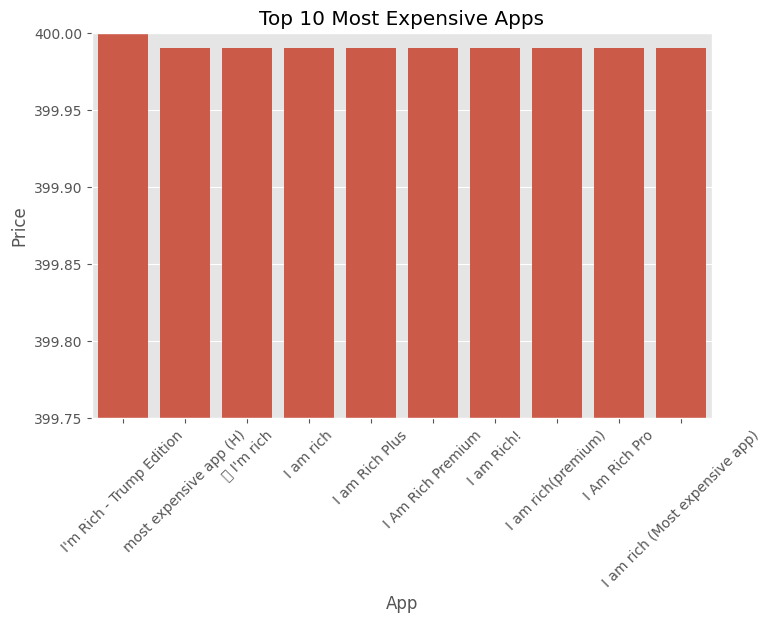

In [159]:
top_expensive_apps = df.nlargest(10, 'Price')
plt.figure(figsize=(8,5))
sns.barplot(x=top_expensive_apps['App'], y=top_expensive_apps['Price'])
plt.title('Top 10 Most Expensive Apps')
plt.xticks(rotation=45)
plt.ylim(399.75, top_expensive_apps['Price'].max())
plt.show()

In [92]:
highest_genre = df['Genres'].mode()[0]
highest_genre


'Tools'

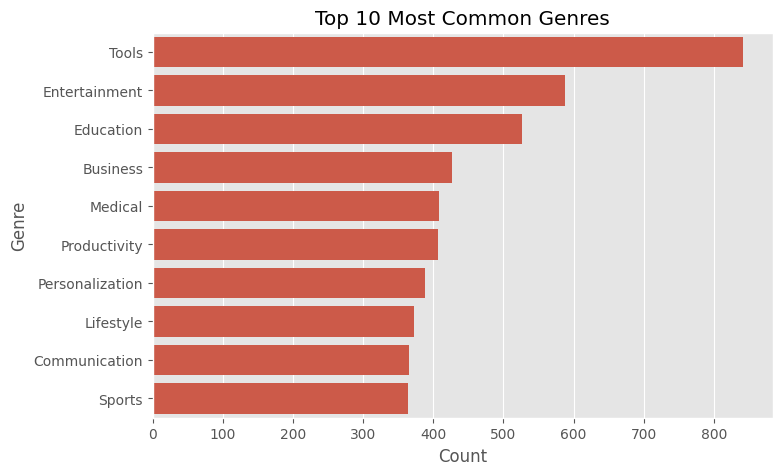

In [162]:
top_genres = df['Genres'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [95]:
free_apps = df[df['Price'] == 0]
paid_apps = df[df['Price'] > 0]
average_size_free = free_apps['Size_MB'].mean()
average_size_paid = paid_apps['Size_MB'].mean()
print("Average size of free apps vs paid apps:\n", average_size_free, "vs", average_size_paid)

Average size of free apps vs paid apps:
 20.68764595496247 vs 19.855163398692813


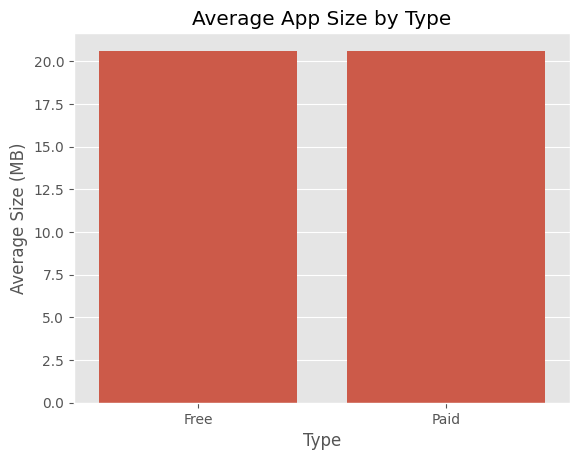

In [163]:
sns.barplot(x=df['Type'], y=df['Size_MB'].mean())
plt.title("Average App Size by Type")
plt.xlabel("Type")
plt.ylabel("Average Size (MB)")
plt.show()

In [ ]:
highest_five_apps = (df[df['Rating'] == df['Rating'].max()]
                     .sort_values(by='Price', ascending=False)
                     .head(5)['App'])
highest_five_apps

5489                    AP Art History Flashcards
7477                   USMLE Step 2 CK Flashcards
5482                   meStudying: AP English Lit
7204    TI-84 CE Graphing Calculator Manual TI 84
5246                        Hey AJ! It's Bedtime!
Name: App, dtype: object

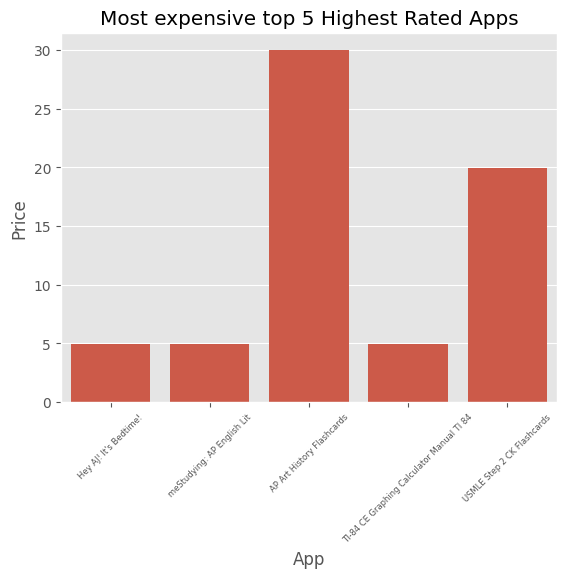

In [170]:
sns.barplot(x=highest_five_apps,y=df['Price'], data=df)
plt.title("Most expensive top 5 Highest Rated Apps")
plt.xlabel("App")
plt.ylabel("Price")
plt.xticks(rotation=45, fontsize=6)
plt.show()

In [111]:
more_than_50k_num=df['Reviews'][df['Reviews'] > 50000].count()
print(more_than_50k_num)

2525


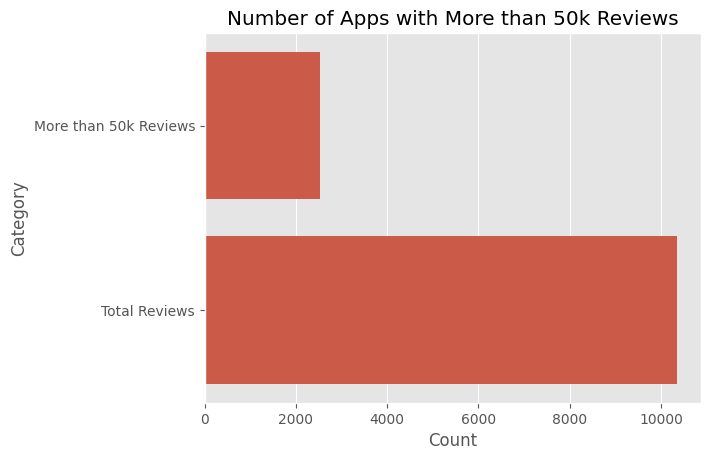

In [172]:

sns.barplot(x=[more_than_50k_num, df['Reviews'].count()], y=["More than 50k Reviews", "Total Reviews"])
plt.title("Number of Apps with More than 50k Reviews")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [114]:
avg_price_grouped = df.groupby(['Genres', 'Installs'])['Price'].mean().reset_index()
avg_price_grouped

,Genres,Installs,Price
0,Action,"1,000+",0.372500
1,Action,"1,000,000+",0.326182
2,Action,10+,0.000000
3,Action,"10,000+",1.871875
4,Action,"10,000,000+",0.012532
...,...,...,...
916,Word,"5,000,000+",0.000000
917,Word,50+,0.000000
918,Word,"50,000+",0.000000
919,Word,"50,000,000+",0.000000


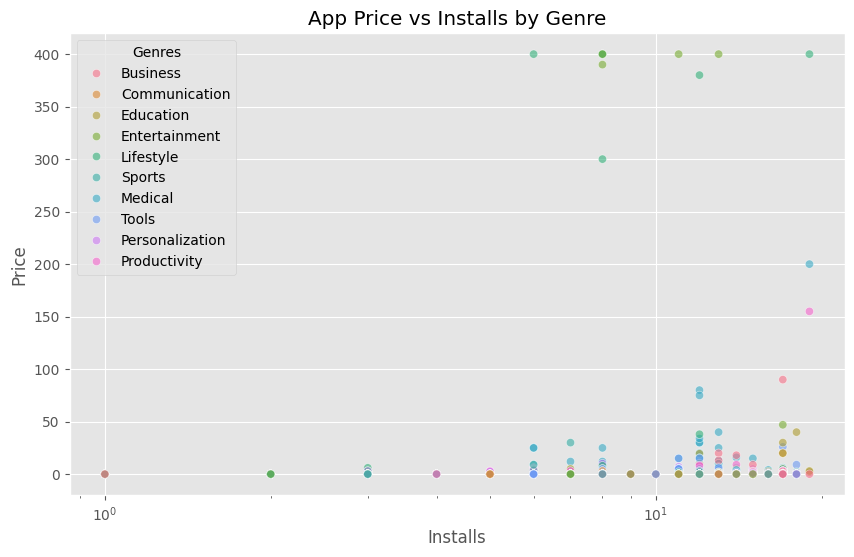

In [ ]:
plt.figure(figsize=(10,6))
top_genres = df['Genres'].value_counts().head(10).index
sns.scatterplot(x="Installs", y="Price", hue="Genres", data=df[df['Genres'].isin(top_genres)], alpha=0.6)
plt.xscale("log") 
plt.title("App Price vs Installs by Genre")
plt.show()


In [119]:
high_rating_apps = df[df['Rating'] > 4.7]
apps_higher_4_7 = high_rating_apps.shape[0]
avg_price_higher_4_7 = high_rating_apps['Price'].mean()

print('Number of apps with rating higher than 4.7:', apps_higher_4_7, '\nTheir average price:', avg_price_higher_4_7)


Number of apps with rating higher than 4.7: 586 
Their average price: 0.455


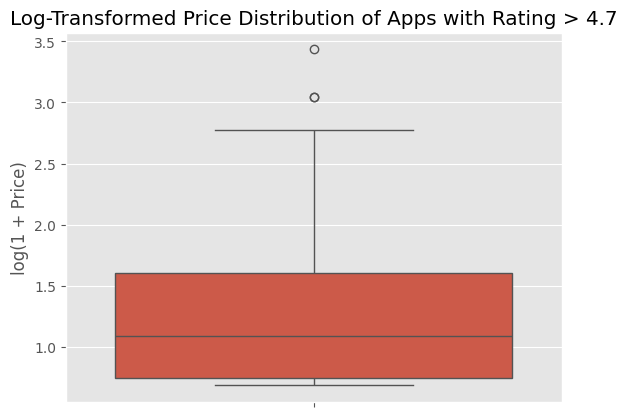

In [ ]:
high_rating_apps = high_rating_apps[high_rating_apps['Price'] > 0].copy()
high_rating_apps['LogPrice'] = np.log1p(high_rating_apps['Price']) 

sns.boxplot(y=high_rating_apps['LogPrice'])
plt.title("Log-Transformed Price Distribution of Apps with Rating > 4.7")
plt.ylabel("log(1 + Price)")
plt.show()

In [ ]:
# What is Google's estimated revenue from apps with 5,000,000+ installs? (google cut=0.3)

df['num_installs']=pd.to_numeric(df['Installs'].str.replace(',','').str.replace('+',''))


In [125]:
apps_with_5m_installs = df[df['num_installs'] > 5000000]
revenue = np.sum(np.dot(apps_with_5m_installs['Price'], apps_with_5m_installs['num_installs'])) * 0.3
print(f"Google's estimated revenue from apps with 5,000,000+ installs is: ${revenue:,.2f}")

Google's estimated revenue from apps with 5,000,000+ installs is: $44,910,000.00


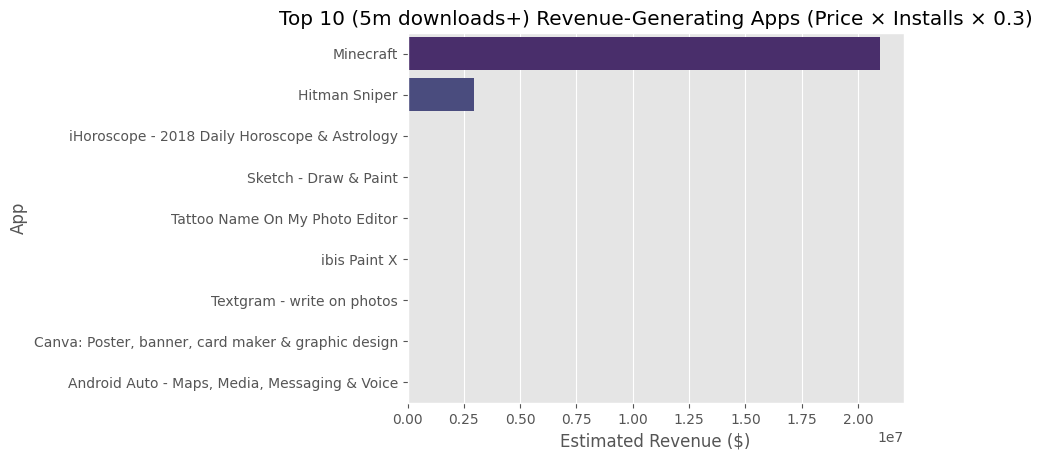

In [186]:
apps_with_5m_installs['Estimated_Revenue'] = apps_with_5m_installs['Price'] * apps_with_5m_installs['num_installs'] * 0.3

top_revenue_apps = apps_with_5m_installs.sort_values('Estimated_Revenue', ascending=False).head(10)

sns.barplot(x='Estimated_Revenue', y='App', data=top_revenue_apps, palette='viridis')
plt.title("Top 10 (5m downloads+) Revenue-Generating Apps (Price × Installs × 0.3)")
plt.xlabel("Estimated Revenue ($)")
plt.ylabel("App")
plt.show()


In [129]:
max_size_free_app = df[df['Type'] == 'Free']['Size_MB'].max()
min_size_free_app = df[df['Type'] == 'Free']['Size_MB'].min()
max_size_paid_app = df[df['Type'] == 'Paid']['Size_MB'].max()
min_size_paid_app = df[df['Type'] == 'Paid']['Size_MB'].min()
print(f"Max size of free app: {max_size_free_app} MB, Min size of free app: {min_size_free_app} MB")
print(f"Max size of paid app: {max_size_paid_app} MB, Min size of paid app: {min_size_paid_app} MB")

Max size of free app: 100.0 MB, Min size of free app: 1.0 MB
Max size of paid app: 100.0 MB, Min size of paid app: 1.0 MB


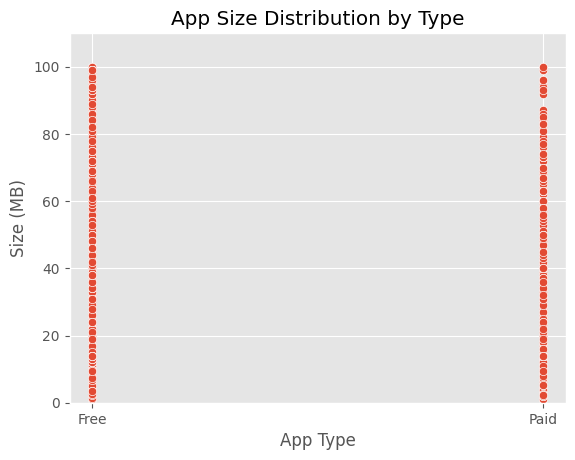

In [189]:
sns.scatterplot(x='Type', y='Size_MB', data=df, palette='viridis')
plt.title("App Size Distribution by Type")
plt.xlabel("App Type")
plt.ylabel("Size (MB)")
plt.ylim(0, df['Size_MB'].max() + 10)  # Set y-axis limits
plt.show()


<Axes: >

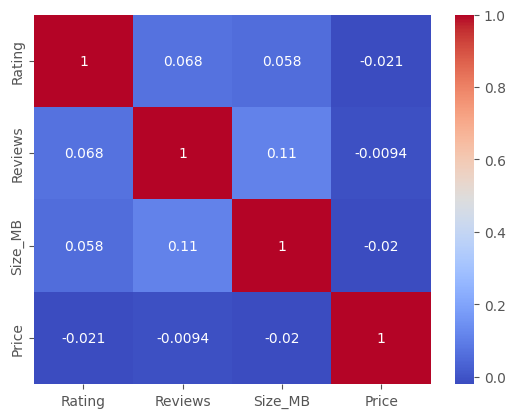

In [ ]:
correlation_matrix = df[['Rating', 'Reviews', 'Size_MB', 'Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

- There is almost no meaningful correlation between app rating, number of reviews, size, and price.

- In other words, users’ ratings are largely independent of app price, size, or how many reviews an app has.

In [144]:
apps_by_type_and_rating = df.groupby(['Type', 'Content Rating']).size().unstack(fill_value=0)
print(apps_by_type_and_rating)


Content Rating  Adults only 18+  Everyone  Everyone 10+  Mature 17+  Teen  \
Type                                                                        
Free                          3      7720           345         428  1094   
Paid                          0       662            32          19    52   

Content Rating  Unrated  
Type                     
Free                  2  
Paid                  0  


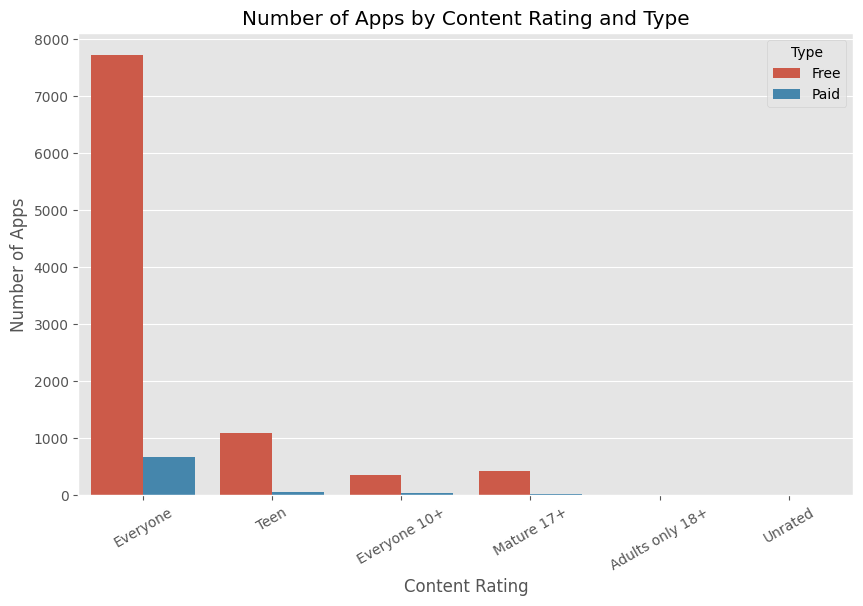

In [192]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Content Rating', hue='Type')

plt.title("Number of Apps by Content Rating and Type")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.legend(title="Type")
plt.xticks(rotation=30)
plt.show()


In [ ]:

apps_4x = df[df['Android_Ver_Num'].between(4.0, 4.9)].shape[0]
print("Number of apps compatible with Android 4.x:", apps_4x)


Number of apps compatible with Android 4.x: 0        4.1
1        4.1
2        4.1
3        4.2
4        4.4
        ... 
10835    4.0
10836    4.1
10837    4.1
10839    4.1
10840    4.1
Name: Android_Ver_Num, Length: 8206, dtype: float64


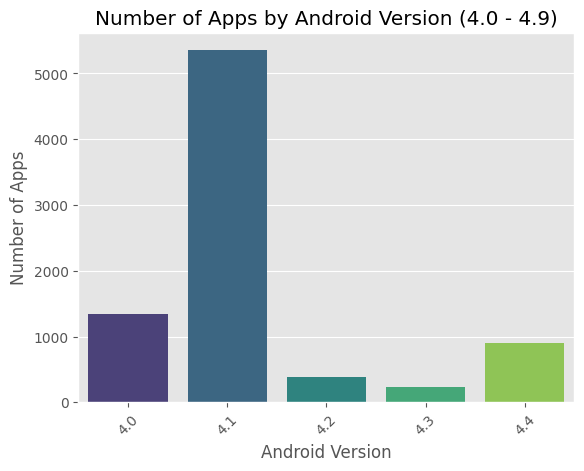

In [196]:

sns.countplot(x='Android_Ver_Num', data=df[df['Android_Ver_Num'].between(4.0, 4.9)], palette='viridis')
plt.title("Number of Apps by Android Version (4.0 - 4.9)")
plt.xlabel("Android Version")
plt.ylabel("Number of Apps")
plt.xticks(rotation=45)
plt.show()